In [82]:
# Author : Pooja Hagavane
# Importing files required for classification
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn

In [83]:
# Load iris data for PCA and LDA
irisDataSet = pd.read_csv('iris.data', sep=',')
# Naming colums
irisDataSet.columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

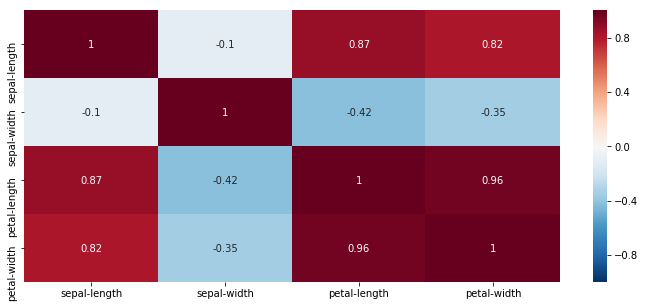

In [84]:
# Checking the corelation between the target variable and predictor variables
correlation = irisDataSet.corr()
plt.figure(figsize=(12, 5))
seaborn.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [85]:
# Correlation values
correlation['petal-width'].sort_values(ascending=False)

petal-width     1.000000
petal-length    0.962314
sepal-length    0.816971
sepal-width    -0.350733
Name: petal-width, dtype: float64

In [86]:
# Using LabelEncoder() to encode class such as Iris-setosa etc to numbers such as 0,1,2
le = preprocessing.LabelEncoder()
irisDataSet['class'] = le.fit_transform(irisDataSet['class'])
# Separating target class from data
X = irisDataSet.drop('class', axis = 1)
y = irisDataSet['class']

In [87]:
# We separate training data and testing data without applying PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)

In [93]:
# apply LDA for classification
colors = ['blue', 'red', 'green']
lw = 2
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_train, y_train).transform(X_train)
predictions = lda.predict(X_test)
LDA1acc = accuracy_score(y_test, predictions) * 100
print("Accuracy:",LDA1acc,"%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 92.5925925926 %
Confusion Matrix:
[[46  1  0]
 [ 0 41  5]
 [ 0  4 38]]
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        47
          1       0.89      0.89      0.89        46
          2       0.88      0.90      0.89        42

avg / total       0.93      0.93      0.93       135



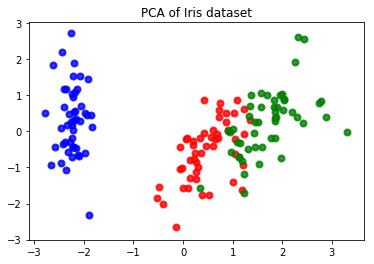

In [89]:
# Scalarizing data (mean = 0 and varience = 1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Applying PCA 
pca = PCA(n_components=2)
X_pc = pca.fit_transform(X)

# Scatter plot of data after applying PCA
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_pc[y == i, 0], X_pc[y == i, 1], color=color, alpha=.8, lw=lw,)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris dataset')
plt.show()

In [90]:
# We separate training data and testing data after applying PCA
X_train, X_test, y_train, y_test = train_test_split(X_pc, y, test_size = 0.9, random_state = 42)


In [91]:
# apply LDA for classification after applying PCA
colors = ['blue', 'red', 'green']
lw = 2
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_train, y_train).transform(X_train)
predictions = lda.predict(X_test)
LDA2acc = accuracy_score(y_test, predictions) * 100
print("Accuracy:",LDA2acc,"%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 92.5925925926 %
Confusion Matrix:
[[46  1  0]
 [ 0 41  5]
 [ 0  4 38]]
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        47
          1       0.89      0.89      0.89        46
          2       0.88      0.90      0.89        42

avg / total       0.93      0.93      0.93       135



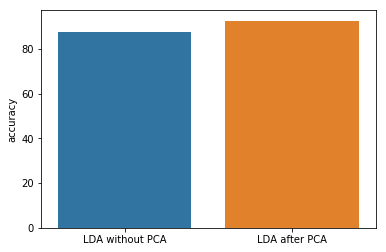

LDA works better after applying PCA for IRIS data


In [92]:
# Conclusion: 
seaborn.barplot(x=['LDA without PCA', 'LDA after PCA'], y=[LDA1acc, LDA2acc])
plt.ylabel('accuracy')
plt.show()
print("LDA works better after applying PCA for IRIS data")